# Figure Four: Elemental and Charge State Composition

- Panel (a): Fe/O ratio 
- Panel (b): Ion charge state ratios
- Panels (c), (d), (e): Correlations between abundances

## Imports

In [1]:
import os

import datetime

import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol='lavender'
sacol = 'violet'
scol = 'lightgreen'
hcol = 'lightblue'
aa = 0.6
lw=2
clon = '#ae017e'
clat = '#085A99'
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring']

# REGIONS
loc_hcs = [113, 116]
ssw = [166, 175]
sasw = [175, 185]
fsw = [70, 85]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'

# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 18})
plt.style.use(plot_style)

## Data

In [2]:
# regular data
parker = pd.read_csv(os.path.realpath('results/parker.csv'))
orbiter = pd.read_csv(os.path.realpath('results/orbiter.csv'))
abun = pd.read_csv(os.path.realpath('results/abun.csv'))
smag = pd.read_csv(os.path.realpath('results/solo_mag.csv'))
merged_df = pd.read_csv(os.path.realpath('results/merged_df.csv'))
pss = pd.read_csv(os.path.realpath('results/pss.csv'))
oss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/oss.csv')

# timesampled data
parkerdownt = pd.read_csv(os.path.realpath('results/parkerdownt.csv'))
orbiterdownt = pd.read_csv(os.path.realpath('results/orbiterdownt.csv'))
abundownt = pd.read_csv(os.path.realpath('results/abundownt.csv'))
smagdownt = pd.read_csv(os.path.realpath('results/smagdownt.csv'))

# longitudinally sampled data
parkerdownl = pd.read_csv(os.path.realpath('results/parkerdownl.csv'))
orbiterdownl = pd.read_csv(os.path.realpath('results/orbiterdownl.csv'))
abundownl = pd.read_csv(os.path.realpath('results/abundownl.csv'))
smagdownl = pd.read_csv(os.path.realpath('results/smagdownl.csv'))

# PFSS/MHD data
tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/mhd_footpoints.dat', sep='\s+') 
so_tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/so_mhd_footpoints.dat', sep='\s+')
pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/psp_pfss.csv')
so_pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/so_pfss.csv')

# FIX TIMESTAMPS
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parker.Time]
orbiter['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiter.Time]
pss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pss.Time]
oss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in oss.Time]
smag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in smag.Time]
abun['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in abun.Time]
so_pfss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in so_pfss.times]
parkerdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parkerdownt.Time]
orbiterdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiterdownt.Time]
smagdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in smagdownt.Time]
abundownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in abundownt.Time]

## Figure Four: SWA/HIS Abundance Figure

- Panel (a): Fe/O ratio 
- Panel (b): Ion charge state ratios
- Panels (c), (d), (e): Correlations between abundances

In [3]:
### REGION IDENTIFICATION ###
lon_footpoints = abun.lon
fast = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
salf = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


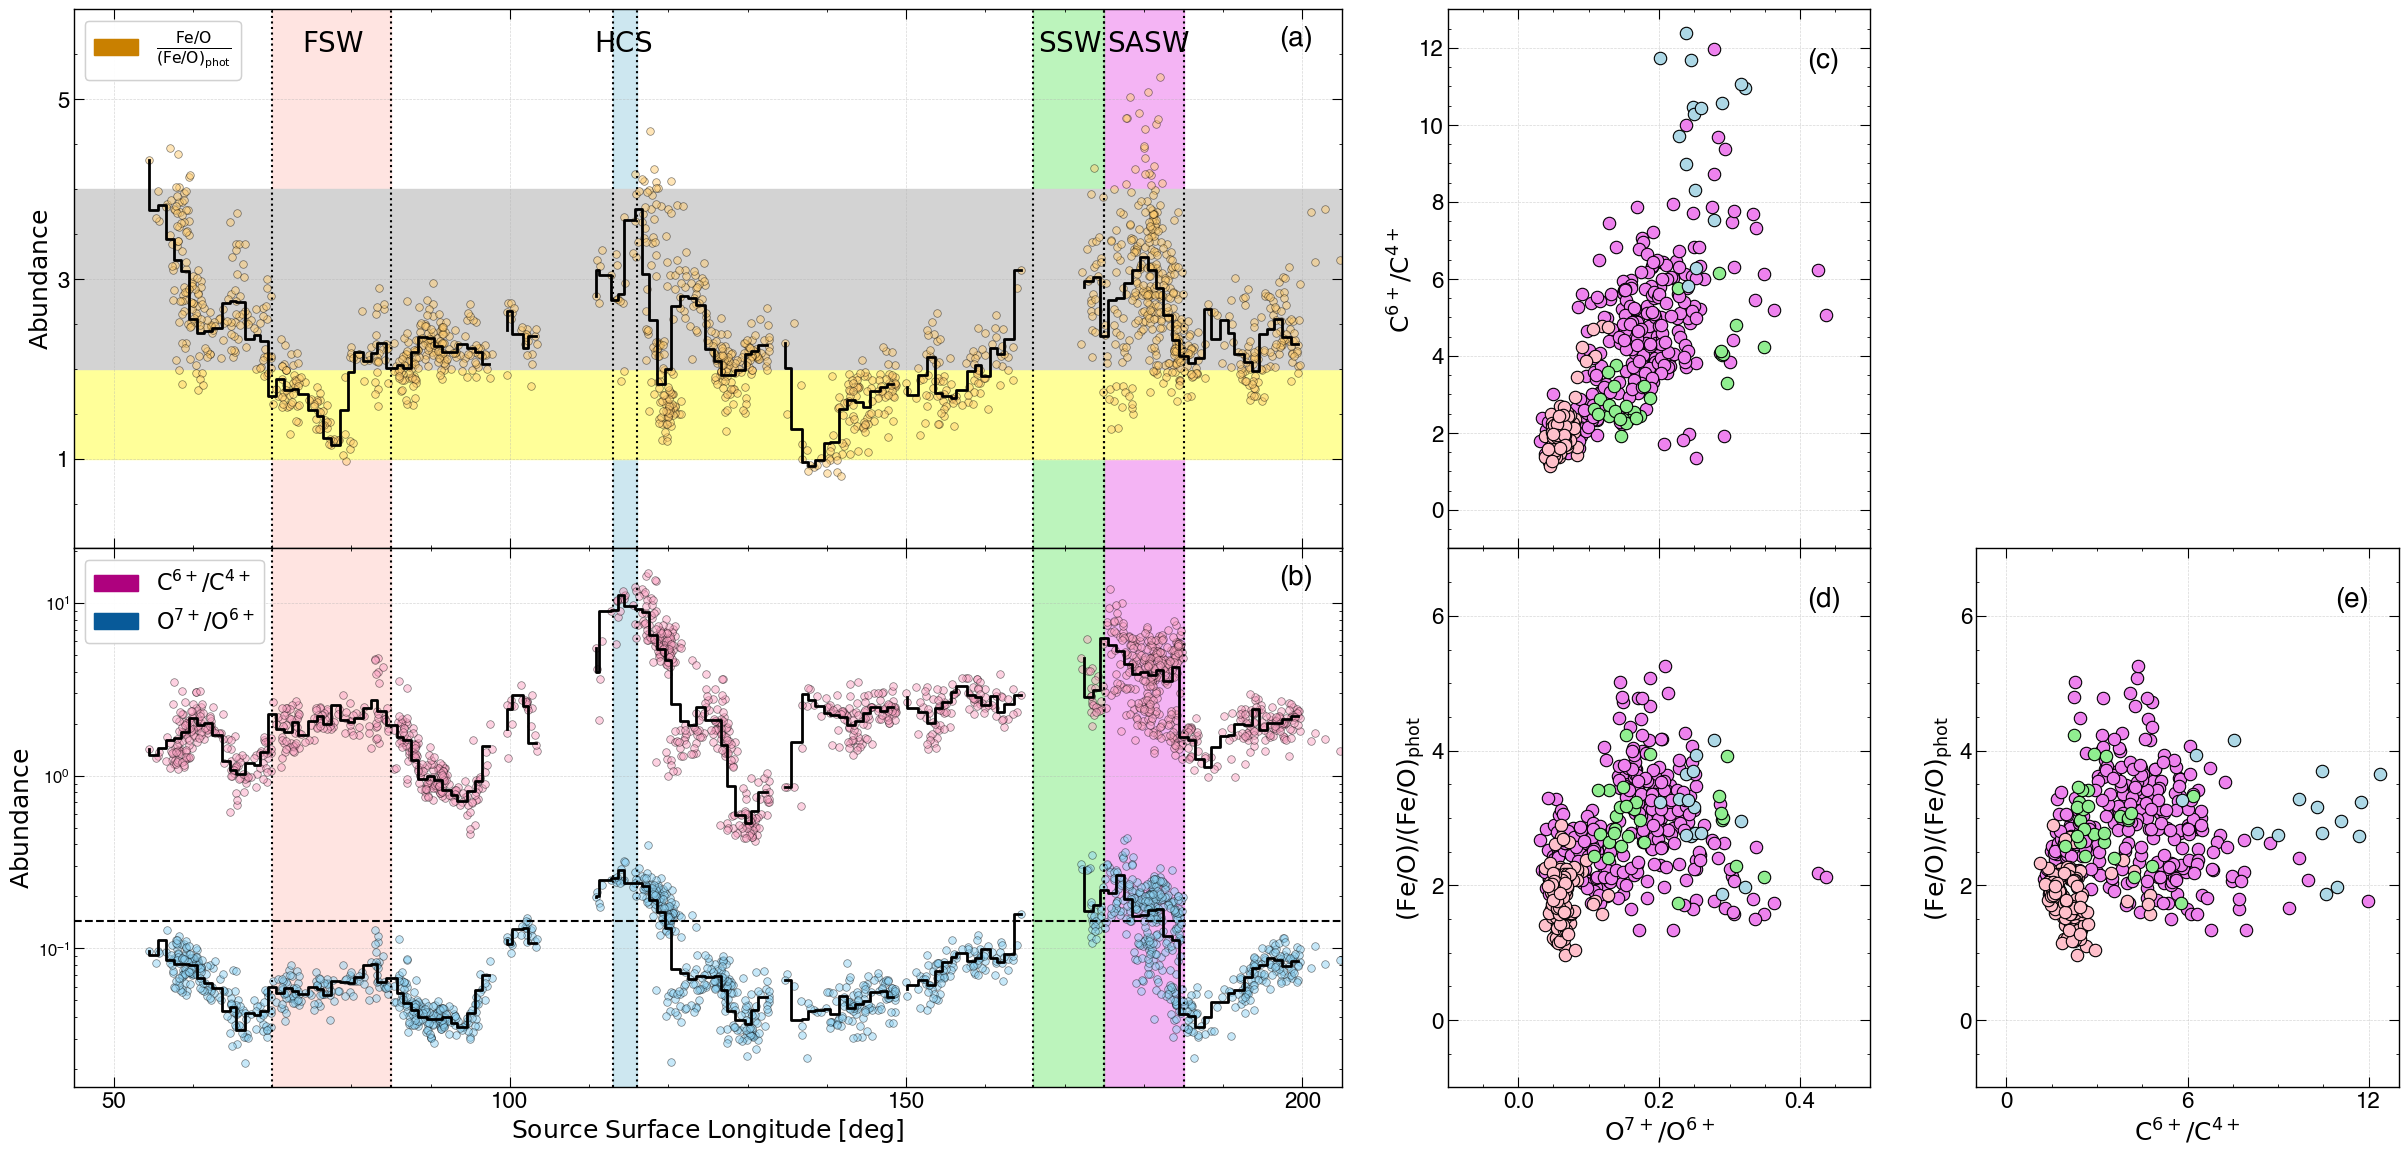

In [7]:
### SET UP FIGURE
fig = plt.figure(figsize=(30, 14))
grid = plt.GridSpec(2, 3, width_ratios=[3, 1, 1], hspace=0, wspace=.15)
si=30

##### ---------- PANEL (A): ELEMENTAL COMPOSITION  ---------- ######
ax1 = fig.add_subplot(grid[0, 0])

### PLOT DATA
ax1.scatter(abun.lon, abun.iron/0.0589, color=lightc[2], s=si, alpha=0.5, linewidth=0.5, edgecolor='k')
ax1.step(abundownl.lon, abundownl.iron/0.0589, color='k', linewidth=2)
ax1.text(0.95, 0.97, '(a)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### HIGHLIGHT SPANS
ax1.axhspan(1, 2, alpha=1, color='#FFFF99', zorder=-2)
ax1.axhspan(2, 4, alpha=1, color='#D3D3D3', zorder=-2)

### AXES LABELS
ax1.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50), ylim=(0, 6), yticks=np.arange(1, 5.1, step=2))
ax1.set_ylabel(r'$\rm Abundance$', fontsize=18)

### LEGEND
Fe_patch = mpatches.Patch(color=c[2],  label= r'$\rm \frac{Fe/O}{(Fe/O)_{phot}}$')
leg0 = ax1.legend(handles=[Fe_patch], loc='upper left', fontsize=16)
ax1.add_artist(leg0)

### SHADE REGIONS
ax1.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
ax1.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
ax1.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
ax1.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
ax1.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

### REGION LABELS
ax = ax1
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.text(0.41, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.18, 0.96, r'$\rm FSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.76, 0.96, r'$\rm SSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.815, 0.96, r'$\rm SASW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left') 

##### ---------- PANEL (B): ION CHARGE STATE RATIOS  ---------- ######
ax1 = fig.add_subplot(grid[1, 0])

### PLOT DATA
ax1.scatter(abun.lon, abun.car, color=lightc[0], s=si, alpha=0.5, linewidth=0.5, edgecolor='k')
ax1.scatter(abun.lon, abun.oxy, color=lightc[1], s=si, alpha=0.5, linewidth=0.5, edgecolor='k')
ax1.step(abundownl.lon, abundownl.car, color='k', linewidth=2)
ax1.step(abundownl.lon, abundownl.oxy, color='k', linewidth=2)
ax1.text(0.95, 0.97, '(b)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax1.set_yscale('log')

### OXYGEN THRESHOLD
ax1.axhline(y=0.145, ls='dashed', color='k')

### LEGEND 
C_patch = mpatches.Patch(color=c[0], label=r'$\rm C^{6+}/C^{4+}$')
O_patch = mpatches.Patch(color=c[1],  label=r'$\rm O^{7+}/O^{6+}$')
leg0 = ax1.legend(handles=[C_patch, O_patch], loc='upper left', fontsize=16)
ax1.add_artist(leg0)

### AXES LABELS
ax1.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax1.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax1.set_xlabel(r'$\rm Source \; Surface \; Longitude \; [deg]$', fontsize=18)
ax1.set_ylabel(r'$\rm Abundance$', fontsize=18)

### SHADE REGIONS
ax1.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
ax1.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
ax1.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
ax1.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
ax1.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

##### ---------- PANELS (C, D, E): CORRELATION PLOTS ---------- ######
df = pd.read_csv(os.path.join(DF_DIR, 'abun.csv'))

### CREATE PLOTS
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax3.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax4.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

### PLOT DATA
colors = [fcol, hcol, sacol, scol]
var = [['oxy', 'car'], ['oxy', 'iron'], ['car', 'iron']]
ss=80
for i, ax in enumerate([ax2, ax3, ax4]):
    ax.tick_params(axis='both', which='major', labelsize=16)
    d1 = df[var[i][0]]
    d2 = df[var[i][1]]
    if var[i][0] == 'iron':
        d1 = df[var[i][0]] / 0.0589
    elif var[i][1] == 'iron':
        d2 = df[var[i][1]] / 0.0589

    ax.scatter(d1[fast], d2[fast], c='pink', s=ss, linewidth=0.8, edgecolor='k', zorder=5)
    ax.scatter(d1[slow], d2[slow], c=scol, s=ss, linewidth=0.8, edgecolor='k', zorder=5)
    ax.scatter(d1[salf], d2[salf], c=sacol, s=ss, linewidth=0.8, edgecolor='k')
    ax.scatter(d1[hhcs], d2[hhcs], c=hcol, s=ss, linewidth=0.8, edgecolor='k', zorder=5)

### AXES LABELS
labels = [r'$\rm O^{7+}/O^{6+}$', r'$\rm C^{6+}/C^{4+}$',  r'$\rm (Fe/O)/(Fe/O)_{phot}$']
ax2.set_xlabel(xlabel=labels[0], fontsize=18)
ax2.set_ylabel(ylabel=labels[1], fontsize=18)
ax3.set_xlabel(xlabel=labels[0], fontsize=18)
ax3.set_ylabel(ylabel=labels[2], fontsize=18)
ax4.set_xlabel(xlabel=labels[1], fontsize=18)
ax4.set_ylabel(ylabel=labels[2], fontsize=18)
ax2.set(xlim=(-0.1, 0.5), xticks=np.arange(0, 0.41, step=0.2), ylim=(-1, 13), yticks=np.arange(0, 13, step=2))
ax3.set(xlim=(-0.1, 0.5), xticks=np.arange(0, 0.41, step=0.2), ylim=(-1, 7), yticks=np.arange(0, 6.1, step=2))
ax4.set(xlim=(-1, 13), xticks=np.arange(0, 12.1, step=6), ylim=(-1, 7), yticks=np.arange(0, 6.1, step=2))
ax2.text(0.85, 0.93, '(c)', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax3.text(0.85, 0.93, '(d)', transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax4.text(0.85, 0.93, '(e)', transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### SAVE FIGURE
fig.savefig('figures/fig4.png', bbox_inches='tight') #PNG
fig.savefig('eps_figures/fig4.eps', bbox_inches='tight') #EPS

## Table One: Correlations


In [ ]:
df = pd.read_csv(os.path.join(DF_DIR, 'abun.csv'))
df = df.dropna()
lon_footpoints = df.lon
fast = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
salf = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
print(np.min(abun.iron/0.0589), np.max(abun.iron/0.0589))
corr1 = stats.spearmanr(df.oxy[fast], df.car[fast])[0]
corr2 = stats.spearmanr(df.oxy[fast], df.iron[fast])[0]
corr3 = stats.spearmanr(df.iron[fast], df.car[fast])[0]
print("FSW", corr1, corr2, corr3)
corr1 = stats.spearmanr(df.oxy[slow], df.car[slow])[0]
corr2 = stats.spearmanr(df.oxy[slow], df.iron[slow])[0]
corr3 = stats.spearmanr(df.iron[slow], df.car[slow])[0]
print("SSW", corr1, corr2, corr3)
corr1 = stats.spearmanr(df.oxy[salf], df.car[salf])[0]
corr2 = stats.spearmanr(df.oxy[salf], df.iron[salf])[0]
corr3 = stats.spearmanr(df.iron[salf], df.car[salf])[0]
print("SASW", corr1, corr2, corr3)
corr1 = stats.spearmanr(df.oxy[hhcs], df.car[hhcs])[0]
corr2 = stats.spearmanr(df.oxy[hhcs], df.iron[hhcs])[0]
corr3 = stats.spearmanr(df.iron[hhcs], df.car[hhcs])[0]
print("HCS", corr1, corr2, corr3)
corr1 = stats.spearmanr(df.oxy, df.car)[0]
corr2 = stats.spearmanr(df.oxy, df.iron)[0]
corr3 = stats.spearmanr(df.iron, df.car)[0]
print("All", corr1, corr2, corr3)